![Dr. Semmelweis](ignaz_semmelweis_1860.jpeg)

Hungarian physician Dr. Ignaz Semmelweis worked at the Vienna General Hospital with childbed fever patients. Childbed fever is a deadly disease affecting women who have just given birth, and in the early 1840s, as many as 10% of the women giving birth died from it at the Vienna General Hospital. Dr.Semmelweis discovered that it was the contaminated hands of the doctors delivering the babies, and on June 1st, 1847, he decreed that everyone should wash their hands, an unorthodox and controversial request; nobody in Vienna knew about bacteria.

I will reanalyze the data that made Semmelweis discover the importance of handwashing and its impact on the hospital.

The data is stored as two CSV files within the `data` folder.

`yearly_deaths_by_clinic.csv` contains the number of women giving birth at the two clinics at the Vienna General Hospital between the years 1841 and 1846.

| Column | Description |
|--------|-------------|
|`year`  |Years (1841-1846)|
|`births`|Number of births|
|`deaths`|Number of deaths|
|`clinic`|Clinic 1 or clinic 2|

`monthly_deaths.csv` contains data from 'Clinic 1' of the hospital where most deaths occurred.

| Column | Description |
|--------|-------------|
|`date`|Date (YYYY-MM-DD)
|`births`|Number of births|
|`deaths`|Number of deaths|

In [98]:
# Imported libraries
library(tidyverse)


In [99]:
# Read the yearly data.
yearly <- read_csv("data/yearly_deaths_by_clinic.csv")
glimpse(yearly)

Rows: 12 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): clinic
dbl (3): year, births, deaths

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 12
Columns: 4
$ year   <dbl> 1841, 1842, 1843, 1844, 1845, 1846, 1841, 1842, 1843, 1844, 184…
$ births <dbl> 3036, 3287, 3060, 3157, 3492, 4010, 2442, 2659, 2739, 2956, 324…
$ deaths <dbl> 237, 518, 274, 260, 241, 459, 86, 202, 164, 68, 66, 105
$ clinic <chr> "clinic 1", "clinic 1", "clinic 1", "clinic 1", "clinic 1", "cl…


In [100]:
# Check the summary of the yearly data
summary(yearly)

      year          births         deaths         clinic         
 Min.   :1841   Min.   :2442   Min.   : 66.0   Length:12         
 1st Qu.:1842   1st Qu.:2902   1st Qu.:100.2   Class :character  
 Median :1844   Median :3108   Median :219.5   Mode  :character  
 Mean   :1844   Mean   :3153   Mean   :223.3                     
 3rd Qu.:1845   3rd Qu.:3338   3rd Qu.:263.5                     
 Max.   :1846   Max.   :4010   Max.   :518.0                     

In [101]:
# Read the second dataset.
monthly <- read_csv("data/monthly_deaths.csv")
glimpse(monthly)

Rows: 98 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (2): births, deaths
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 98
Columns: 3
$ date   <date> 1841-01-01, 1841-02-01, 1841-03-01, 1841-04-01, 1841-05-01, 18…
$ births <dbl> 254, 239, 277, 255, 255, 200, 190, 222, 213, 236, 235, 307, 311…
$ deaths <dbl> 37, 18, 12, 4, 2, 10, 16, 3, 4, 26, 53, 64, 38, 27, 26, 10, 18,…


In [102]:
# Check for missing values
lapply(yearly, function(x) sum(is.na(x)))

$year
[1] 0

$births
[1] 0

$deaths
[1] 0

$clinic
[1] 0

In [103]:
# Check the summary of monthly data.
summary(monthly)

      date                births          deaths     
 Min.   :1841-01-01   Min.   :190.0   Min.   : 0.00  
 1st Qu.:1843-02-08   1st Qu.:242.5   1st Qu.: 8.00  
 Median :1845-02-15   Median :264.0   Median :16.50  
 Mean   :1845-02-11   Mean   :267.0   Mean   :22.47  
 3rd Qu.:1847-02-22   3rd Qu.:292.8   3rd Qu.:36.75  
 Max.   :1849-03-01   Max.   :406.0   Max.   :75.00  

In [104]:
# Check for the missing values in the monthly data.
lapply(monthly, function(x) sum(is.na(x)))

$date
[1] 0

$births
[1] 0

$deaths
[1] 0

In [105]:
# Add the proportion of deaths column to each dataframe.
yearly <- yearly %>% mutate(proportion_deaths = deaths/births)
monthly <- monthly %>% mutate(proportion_deaths = deaths/births)

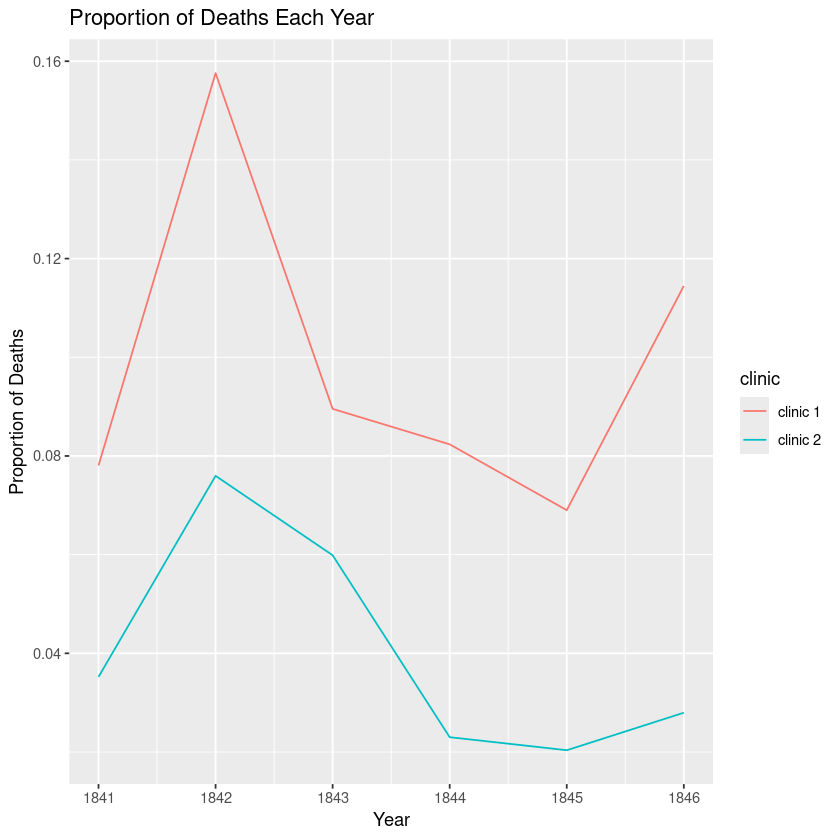

In [106]:
# Visualize the death proportions yearly.
ggplot(yearly, aes(x = year, y = proportion_deaths, color = clinic)) +
  geom_line() + 
  ggtitle("Proportion of Deaths Each Year") +
  labs(x = "Year", y = "Proportion of Deaths")

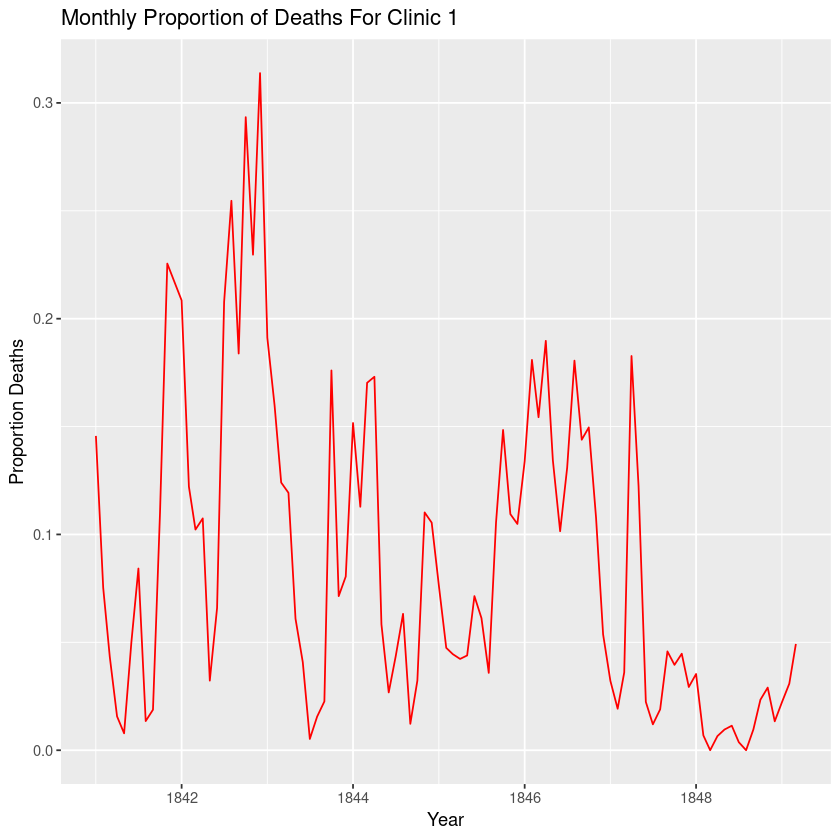

In [107]:
# Visualize the death proportion monthly
ggplot(monthly, aes(date, proportion_deaths)) +
  geom_line(color = "red") +
  labs(x = "Year", y = "Proportion Deaths") +
  ggtitle("Monthly Proportion of Deaths For Clinic 1")

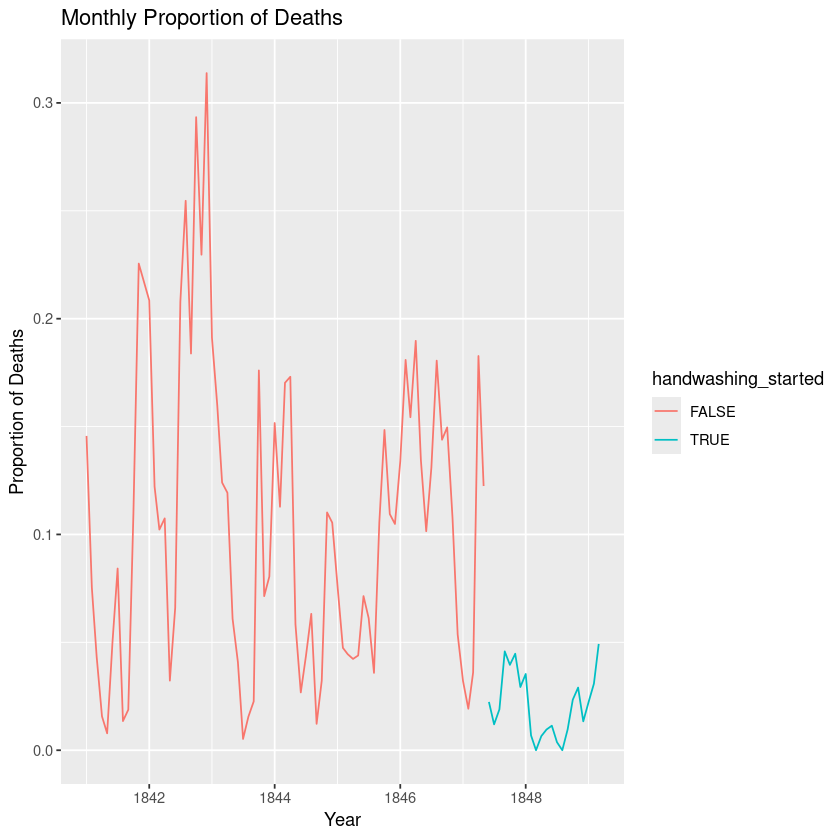

In [108]:
# Create the column indicating hand washing started
threshold <- as.Date("1847-06-01")
monthly <- monthly %>% 
      mutate(handwashing_started = date >= threshold)

# Plot the results
ggplot(monthly, aes(date, proportion_deaths, color = handwashing_started)) +
     geom_line() + 
     ggtitle("Monthly Proportion of Deaths") +
     labs(x = "Year", y = "Proportion of Deaths")

In [109]:
# Calculate the mean proportion of deaths before and after handwashing policy.
monthly_summary <- monthly %>% 
                   group_by(handwashing_started) %>%
                   summarize(mean_proprtion_deaths = mean(proportion_deaths))
head(monthly_summary)

handwashing_started,mean_proprtion_deaths
<lgl>,<dbl>
FALSE,0.10504998
TRUE,0.02109338
